In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Statistical Models, Supervised Learning, and Function Approximation

Our goal is to find a useful approximation $ \hat{f}(x) $ to the function $ f(x) $ that underlies the predictive relationship between the inputs and outputs. In the theoretical setting of Section 2.4, we saw that squared error loss leads us to the regression function:
$$
f(x) = \mathbb{E}(Y | X = x)
$$
for a quantitative response.

The class of nearest-neighbor methods can be viewed as direct estimates of this conditional expectation, but they can fail in at least two ways:
- If the dimension of the input space is high, the nearest neighbors need not be close to the target point, which can result in large errors.
- If special structure is known to exist, this can be used to reduce both the bias and the variance of the estimates.

We anticipate using other classes of models for $ f(x) $, in many cases specifically designed to overcome the dimensionality problems. Here, we discuss a framework for incorporating them into the prediction problem.

### A Statistical Model for the Joint Distribution \( \Pr(X, Y) \)

Suppose in fact that our data arose from a statistical model:
$$
Y = f(X) + \epsilon,
$$
where the random error $ \epsilon $ has $ \mathbb{E}(\epsilon) = 0 $ and is independent of $ X $. Note that for this model, $ f(x) = \mathbb{E}(Y | X = x) $, and in fact, the conditional distribution $ \Pr(Y | X) $ depends on $ X $ only through the conditional mean $ f(x) $.

The additive error model is a useful approximation to the truth. For most systems, the input-output pairs $ (X, Y) $ will not have a deterministic relationship $ Y = f(X) $. Generally, there will be other unmeasured variables that also contribute to $ Y $, including measurement error. The additive model assumes that we can capture all these departures from a deterministic relationship via the error $ \epsilon $.

For some problems, a deterministic relationship does hold. Many of the classification problems studied in machine learning are of this form, where the response surface can be thought of as a colored map defined in $ \mathbb{R}^p $. The training data consist of colored examples from the map $ \{x_i, g_i\} $, and the goal is to be able to color any point. Here, the function is deterministic, and the randomness enters through the $ x $ location of the training points.

For the moment, we will not pursue such problems, but we will see that they can be handled by techniques appropriate for the error-based models.

The assumption in eqn. 2 that the errors are independent and identically distributed is not strictly necessary, but seems to be at the back of our mind.When we average squared errors uniformly in our Expected Prediction Error (EPE) criterion, it becomes natural to use least squares as a data criterion for model estimation as in (2.1). Simple modifications can be made to avoid the independence assumption; for example, we can have $ \text{Var}(Y | X = x) = \sigma(x) $, where both the mean and variance depend on $ X $. In general, the conditional distribution $ \Pr(Y | X) $ can depend on $ X $ in complicated ways, but the additive error model precludes these.

So far, we have concentrated on the quantitative response. Additive error models are typically not used for qualitative outputs $ G $. In this case, the target function $ p(X) $ is the conditional density $ \Pr(G | X) $, and this is modeled directly. For example, for two-class data, it is often reasonable to assume that the data arise from independent binary trials, with the probability of one particular outcome being $ p(X) $, and the other $ 1 - p(X) $. 

Thus, if $ Y $ is the 0–1 coded version of $ G $, then:
$$
\mathbb{E}(Y | X = x) = p(x),
$$
but the variance depends on \( x \) as well:
$$
\text{Var}(Y | X = x) = p(x)[1 - p(x)].
$$




## Supervised Learning

Before we launch into more statistically oriented jargon, we present the function-fitting paradigm from a machine learning point of view. Suppose for simplicity that the errors are additive and that the model $ Y = f(X) + \epsilon $ is a reasonable assumption. Supervised learning attempts to learn $ f $ by example through a teacher. One observes the system under study, both the inputs and outputs, and assembles a training set of observations $ T = \{(x_i, y_i), i = 1, \dots, N\} $. The observed input values to the system $ x_i $ are also fed into an artificial system, known as a learning algorithm (usually a computer program), which also produces outputs $ \hat{f}(x_i) $ in response to the inputs.The learning algorithm has the property that it can modify its input/output relationship $ \hat{f} $ in response to differences $ y_i - \hat{f}(x_i) $ between the original and generated outputs. This process is known as *learning by example*. Upon completion of the learning process, the hope is that the artificial and real outputs will be close enough to be useful for all sets of inputs likely to be encountered in practice.## Function Approximation

The learning paradigm from the previous section has motivated research into the supervised learning problem in the fields of machine learning (with analogies to human reasoning) and neural networks (with biological analogies to the brain). The approach taken in applied mathematics and statistics has been from the perspective of function approximation and estimation.

Here, the data pairs $ \{x_i, y_i\} $ are viewed as points in a $ (p+1) $-dimensional Euclidean space. The function $ f(x) $ has domain equal to the $ p $-dimensional input subspace, and is related to the data via a model such as:

$$
y_i = f(x_i) + \epsilon_i
$$

For convenience, we assume the domain is $ \mathbb{R}^p $, although in general, the inputs can be of mixed types. The goal is to obtain a useful approximation to $ f(x) $ for all $ x $ in some region of $ \mathbb{R}^p $, given the representations in $ T $.

Although less glamorous than the learning paradigm, treating supervised learning as a problem in function approximation allows us to apply geometrical concepts of Euclidean spaces and mathematical concepts of probabilistic inference to the problem.

Many approximations have associated parameters $ \theta $ that can be modified to suit the data. For example, the linear model:

$$
f(x) = x^\top \beta
$$

has \( \theta = \beta \). Another class of useful approximators can be expressed as linear basis expansions:

$$
f_\theta(x) = \sum_{k=1}^{K} h_k(x) \theta_k
$$

where the $ h_k $ are functions or transformations of the input vector $ x $. Traditional examples are polynomial and trigonometric expansions. We also encounter nonlinear expansions, such as the sigmoid transformation common to neural network models:

$$
h_k(x) = \frac{1}{1 + \exp(-x^\top \beta_k)}
$$

We can use least squares to estimate the parameters \( \theta \) by minimizing the residual sum of squares (RSS):

$$
RSS(\theta) = \sum_{i=1}^{N} (y_i - f_\theta(x_i))^2
$$

For the linear model, we get a simple closed-form solution to this minimization problem. This is also true for the basis function methods if the basis functions themselves do not have any hidden parameters. Otherwise, the solution requires iterative or numerical optimization.

While least squares is generally convenient, it is not the only criterion used, and in some cases, it may not be the most suitable.

## Maximum Likelihood Estimation (MLE)

The principle for estimation is **maximum likelihood estimation**. Suppose we have a random sample \( y_i \), \( i = 1, \ldots, N \), from a density \( \text{Pr}_\theta(y) \) indexed by some parameters \( \theta \). The log-probability of the observed sample is:

$$
L(\theta) = \sum_{i=1}^{N} \log \text{Pr}_\theta(y_i).
$$
\tag{2.33}
$$

The principle of maximum likelihood assumes that the most reasonable values for \( \theta \) are those for which the probability of the observed sample is largest.

For the **additive error model** \( Y = f_\theta(X) + \epsilon \), with \( \epsilon \sim \mathcal{N}(0, \sigma^2) \), least squares estimation is equivalent to maximum likelihood estimation using the conditional likelihood:

$$
\text{Pr}(Y|X, \theta) = \mathcal{N}(f_\theta(X), \sigma^2).
$$
\tag{2.34}
$$

Although the additional assumption of normality seems restrictive, the result remains the same. The log-likelihood of the data is:

$$
L(\theta) = -\frac{N}{2} \log(2\pi) - N \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - f_\theta(x_i))^2,
$$
\tag{2.35}
$$

and the only term involving $ \theta $ is the last, which is **RSS(θ)** up to a scalar negative multiplier.
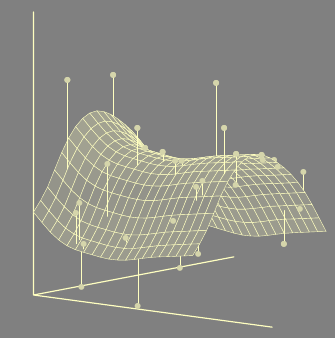

FIGURE 10. Least squares fitting of a function of two inputs. The parameters
of fθ (x) are chosen so as to minimize the sum-of-squared vertical errors.

### Multinomial Likelihood

A more interesting example is the **multinomial likelihood** for the regression function $ \text{Pr}(G|X) $ for a qualitative output $ G $. Suppose we have a model $ \text{Pr}(G = G_k | X = x) = p_{k,\theta}(x), k = 1, \ldots, K $, for the conditional probability of each class given $ X $, indexed by the parameter vector $ \theta $. The log-likelihood (also referred to as the **cross-entropy**) is:

$$
L(\theta) = \sum_{i=1}^{N} \log p_{g_i, \theta}(x_i),
$$
\tag{2.36}
$$

and when maximized, it delivers the values of $ \theta $ that best fit the data in this likelihood sense.


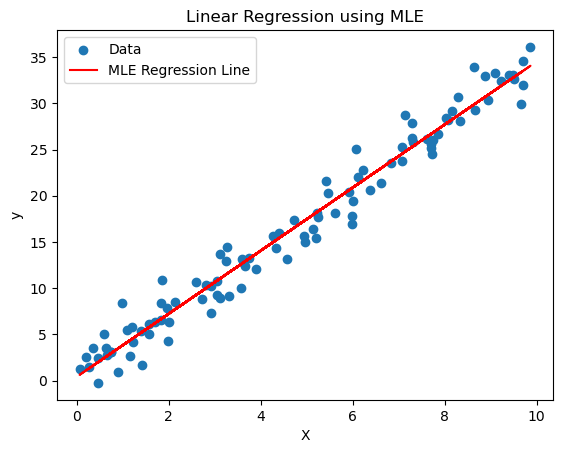

Estimated parameters (theta) from MLE:
 [[0.43019232]
 [3.40804535]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
N = 100
X = np.random.rand(N, 1) * 10  # N data points, single feature
y_true = 3.5 * X + np.random.randn(N, 1) * 2  # True model with noise

# Add bias term (intercept) to X
X_b = np.c_[np.ones((N, 1)), X]

# Closed-form solution for the linear regression model (Normal Equation)
theta_mle = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_true)

# Predictions
y_pred = X_b.dot(theta_mle)

# Plot the data and the regression line
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='MLE Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using MLE')
plt.legend()
plt.show()

# Print the MLE estimated parameters
print("Estimated parameters (theta) from MLE:\n", theta_mle)


# Structured Regression Models

Structured regression models aim to address challenges faced by unstructured methods, such as nearest-neighbor approaches, particularly in high-dimensional data. By introducing specific restrictions on the class of functions used to model the data, structured methods improve prediction performance and computational efficiency.

## 1. Roughness Penalty Approach

One of the most popular methods is penalized regression, where the regular regression error (RSS) is modified with a penalty term. This penalty encourages smoothness or simplicity in the model, thus avoiding overfitting.

The general form is:

$$
PRSS(f; \lambda) = \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2 + \lambda J(f)
$$

Where:
- \( RSS(f) = \sum_{i=1}^{N} (y_i - f(x_i))^2 \) is the residual sum of squares.
- \( J(f) \) is a roughness penalty that discourages overly complex models.
- \( \lambda \) controls the trade-off between fitting the data and regularization.

For example, the smoothing spline for one-dimensional data is defined as:

$$
PRSS(f; \lambda) = \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2 + \lambda \int \left( f''(x) \right)^2 dx
$$

The larger the \( \lambda \), the more the model is penalized for roughness, and the smoother the function \( f \).

## 2. Bayesian Interpretation

This roughness penalty can be interpreted in a Bayesian framework, where \( J(f) \) represents a prior belief about the function \( f \). Minimizing \( PRSS(f; \lambda) \) is equivalent to finding the mode of the posterior distribution.

## 3. Example: Penalized Regression with Ridge Regularization

A common way to implement a roughness penalty in regression is **ridge regression** (L2 regularization), where we penalize the sum of squared coefficients. The ridge regression is defined as:

$$
\theta_{ridge} = \left( X^T X + \lambda I \right)^{-1} X^T y
$$

Where:
- \( X \) is the matrix of input features.
- \( y \) is the vector of outputs.
- \( \lambda \) is the regularization parameter.
- \( I \) is the identity matrix.

## 4. Non-parametric Penalization Example: Smoothing Spline

For one-dimensional inputs, we can penalize roughness by controlling the second derivative of the function. The smoothing spline is defined as:

$$
PRSS(f; \lambda) = \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2 + \lambda \int \left( f''(x) \right)^2 dx
$$

This formulation ensures that the fitted function \( f(x) \) is smooth, with larger values of \( \lambda \) enforcing greater smoothness.


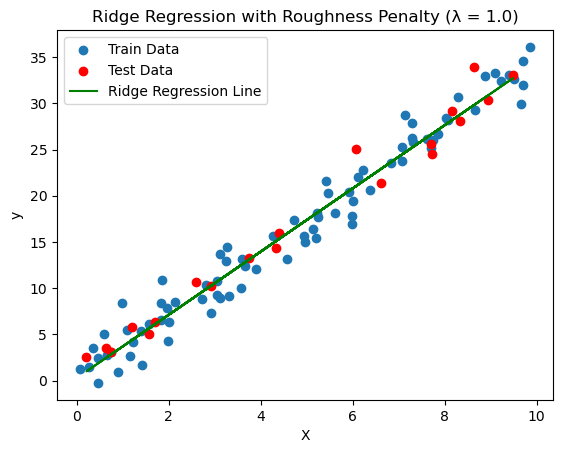

Estimated parameters (theta) from Ridge Regression:
 [[0.29613299]
 [3.41673693]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data for regression
np.random.seed(42)
N = 100
X = np.random.rand(N, 1) * 10  # N data points, single feature
y = 3.5 * X + np.random.randn(N, 1) * 2  # True model with noise

# Add bias term (intercept) to X
X_b = np.c_[np.ones((N, 1)), X]

# Ridge regression function with regularization parameter lambda
def ridge_regression(X, y, lambda_):
    # Closed-form solution for Ridge regression: (X^T X + lambda * I)^-1 X^T y
    I = np.eye(X.shape[1])  # Identity matrix
    theta_ridge = np.linalg.inv(X.T.dot(X) + lambda_ * I).dot(X.T).dot(y)
    return theta_ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Train ridge regression model
lambda_ = 1.0  # Regularization parameter
theta_ridge = ridge_regression(X_train, y_train, lambda_)

# Predict on the test set
y_pred = X_test.dot(theta_ridge)

# Plot the training data and the ridge regression line
plt.scatter(X_train[:, 1], y_train, label='Train Data')
plt.scatter(X_test[:, 1], y_test, color='red', label='Test Data')
plt.plot(X_test[:, 1], y_pred, color='green', label='Ridge Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Roughness Penalty (λ = 1.0)')
plt.legend()
plt.show()

# Print the estimated parameters
print("Estimated parameters (theta) from Ridge Regression:\n", theta_ridge)


# Kernel Methods and Local Regression

Kernel methods and local regression techniques provide ways to estimate the regression function or conditional expectation by defining the nature of the local neighborhood and the class of functions fitted locally.

## 1. Kernel Functions

Kernel methods use a kernel function $ K_\lambda(x_0, x) $ to assign weights to data points based on their distance from a target point $ x_0 $. For example, the Gaussian kernel is given by:

$$
K_\lambda(x_0, x) = \exp\left(-\frac{\|x - x_0\|^2}{2\lambda}\right)
$$

Here:
- $ \|x - x_0\|^2 $ is the squared Euclidean distance between $ x $ and $ x_0 $.
- $ \lambda $ is the bandwidth parameter that controls the width of the neighborhood. 

The Gaussian kernel assigns weights that decrease exponentially with the squared distance from $ x_0 $.

## 2. Nadaraya-Watson Estimator

The simplest form of kernel-based estimation is the Nadaraya-Watson estimator, which is a weighted average of the response values $ y_i $:

$$
\hat{f}(x_0) = \frac{\sum_{i=1}^N K_\lambda(x_0, x_i) y_i}{\sum_{i=1}^N K_\lambda(x_0, x_i)}
$$

## 3. Local Regression

Local regression extends the kernel approach by fitting a local regression function to the data. The local regression estimate $ f_{\hat{\theta}}(x_0) $ minimizes the weighted residual sum of squares:

$$
RSS(f_\theta, x_0) = \sum_{i=1}^N K_\lambda(x_0, x_i) (y_i - f_\theta(x_i))^2
$$

Where \( f_\theta \) is a parameterized function. Some common choices for \( f_\theta \) include:

- **Constant Function**: \( f_\theta(x) = \theta_0 \). This results in the Nadaraya-Watson estimate.
  
- **Local Linear Regression**: \( f_\theta(x) = \theta_0 + \theta_1 x \). This is a popular method that fits a local linear model.

## 4. Nearest-Neighbor Methods

Nearest-neighbor methods can be viewed as kernel methods with a more data-dependent metric. For \( k \)-nearest neighbors, the metric is given by:

$$
K_k(x, x_0) = I(\|x - x_0\| \leq \|x^{(k)} - x_0\|)
$$

Where:
- $ x^{(k)} $ is the $ k $-th nearest neighbor of $ x_0 $.
- $ I(S) $ is the indicator function of the set $ S $.

## 5. High-Dimensional Data

Kernel and local regression methods need to be adapted for high-dimensional data to mitigate the curse of dimensionality.


# Basis Functions and Dictionary Methods

Basis functions and dictionary methods encompass a broad range of techniques for function approximation. These methods include familiar linear and polynomial expansions, as well as more flexible models.

## 1. Basis Function Expansion

In this class of methods, the model for $ f $ is expressed as a linear expansion of basis functions:

$$
f_\theta(x) = \sum_{m=1}^M \theta_m h_m(x)
$$

Here, $ h_m(x) $ are the basis functions, and $ \theta_m $ are the parameters. The term "linear" refers to the linearity in the parameters $ \theta $, not in the functions $ h_m(x) $.

### Polynomial Splines

For one-dimensional \( x \), polynomial splines of degree \( K \) can be represented by a sequence of \( M \) spline basis functions, determined by \( M - K - 1 \) knots. These splines are piecewise polynomials of degree \( K \) between knots and are joined with continuity of degree \( K - 1 \) at the knots.

An example of linear splines includes the basis functions:

- \( b_1(x) = 1 \)
- \( b_2(x) = x \)
- \( b_{m+2}(x) = (x - t_m)^+ \) for \( m = 1, \ldots, M - 2 \)

where \( t_m \) is the \( m \)-th knot, and \( (z)^+ \) denotes the positive part of \( z \).

### Radial Basis Functions

Radial basis functions are symmetric \( p \)-dimensional kernels located at particular centroids. They are expressed as:

$$
f_\theta(x) = \sum_{m=1}^M \theta_m K_{\lambda_m}(\mu_m, x)
$$

where \( K_{\lambda_m}(\mu_m, x) \) is a kernel function, such as the Gaussian kernel:

$$
K_{\lambda}(\mu, x) = \exp\left(-\frac{\|x - \mu\|^2}{2\lambda}\right)
$$

Here, \( \mu_m \) are the centroids and \( \lambda_m \) are the scales of the kernels.

## 2. Neural Networks as Basis Function Methods

A single-layer feed-forward neural network with linear output weights can be viewed as an adaptive basis function method. The model is given by:

$$
f_\theta(x) = \sum_{m=1}^M \beta_m \sigma(\alpha_m^T x + b_m)
$$

where \( \sigma(x) = \frac{1}{1 + \exp(-x)} \) is the activation function. In this model, the directions \( \alpha_m \) and the bias terms \( b_m \) are learned from the data.

## 3. Dictionary Methods

Adaptive basis function methods, including neural networks, are also known as dictionary methods. In these methods, one has access to a potentially infinite set or dictionary \( \mathcal{D} \) of candidate basis functions. Models are built by selecting from this dictionary using a search mechanism or optimization process.

These methods allow for flexible and adaptive modeling by choosing appropriate basis functions from a predefined set or by constructing new ones based on the data.


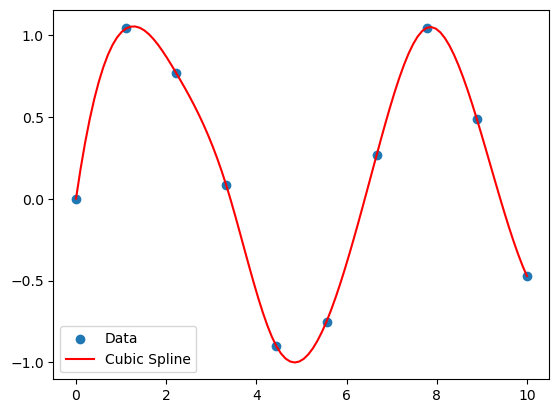

In [3]:
#Polynomial Splines
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Sample data
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)

# Fit a cubic spline
spline = UnivariateSpline(x, y, k=3, s=0)

# Generate points for plotting
x_fit = np.linspace(0, 10, 100)
y_fit = spline(x_fit)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, label='Cubic Spline', color='red')
plt.legend()
plt.show()


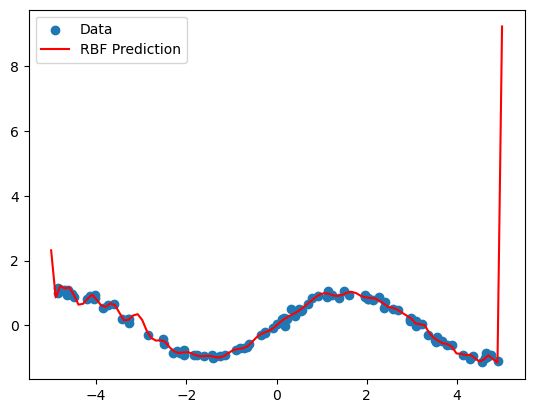

In [4]:
#RBF
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression

# Sample data
X = np.random.uniform(-5, 5, (100, 1))
y = np.sin(X.flatten()) + np.random.normal(0, 0.1, size=X.shape[0])

# Define RBF kernel parameters
gamma = 1.0
K = rbf_kernel(X, X, gamma=gamma)

# Fit a linear model on the transformed features
model = LinearRegression()
model.fit(K, y)

# Predict
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
K_test = rbf_kernel(X_test, X, gamma=gamma)
y_pred = model.predict(K_test)

# Plot
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Data')
plt.plot(np.linspace(-5, 5, 100), y_pred, label='RBF Prediction', color='red')
plt.legend()
plt.show()


2024-09-16 16:21:55.568101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 16:22:00.154923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-16 16:22:00.154972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-09-16 16:22:00.621071: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 16:22:10.986219: W tensorflow/stream_executor/platform/de

4/4 [==============================] - 0s 3ms/step


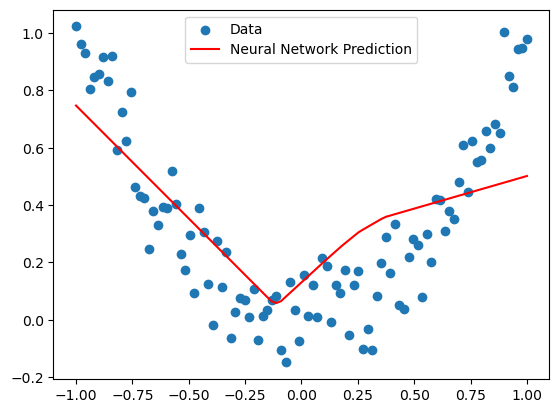

In [5]:
#Neural Networks with Linear Output Weights
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample data
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X.flatten() ** 2 + np.random.normal(0, 0.1, size=X.shape[0])

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)  # Linear output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predict
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, label='Neural Network Prediction', color='red')
plt.legend()
plt.show()


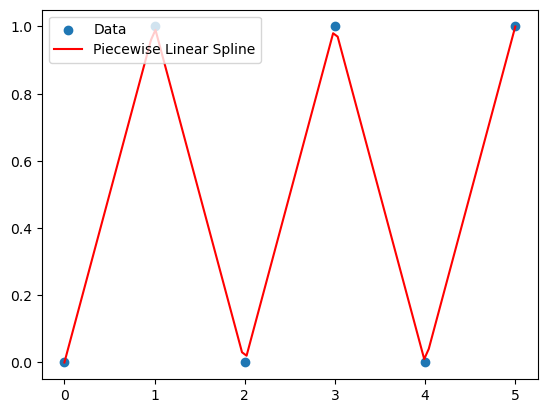

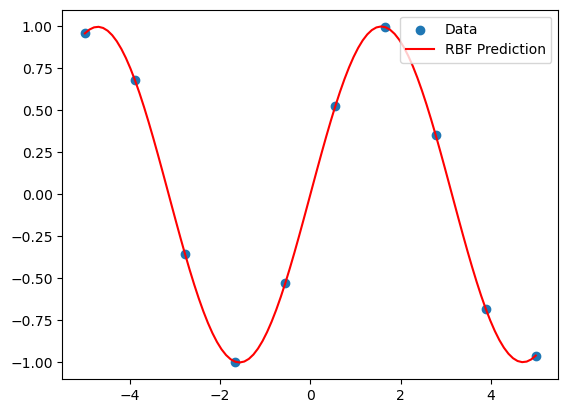

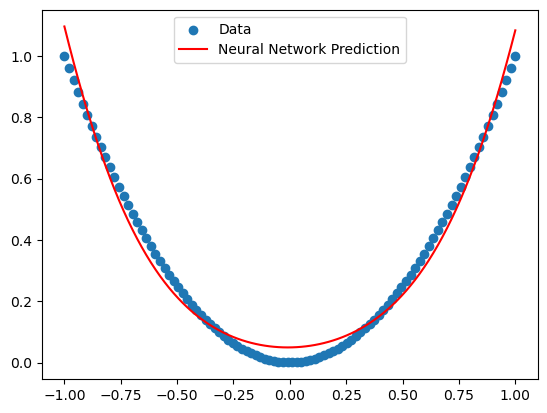

In [6]:
## 
import numpy as np
import matplotlib.pyplot as plt

# Helper function for matrix inversion
def matrix_inverse(X):
    return np.linalg.inv(X)

# 1. Polynomial Splines Implementation (piecewise linear spline)
class PolynomialSpline:
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.coefficients = self._calculate_coefficients()

    def _calculate_coefficients(self):
        coefficients = []
        for i in range(len(self.x) - 1):
            slope = (self.y[i + 1] - self.y[i]) / (self.x[i + 1] - self.x[i])
            intercept = self.y[i] - slope * self.x[i]
            coefficients.append((slope, intercept))
        return coefficients

    def predict(self, x_val):
        for i in range(len(self.x) - 1):
            if self.x[i] <= x_val <= self.x[i + 1]:
                slope, intercept = self.coefficients[i]
                return slope * x_val + intercept
        return None

# 2. Radial Basis Functions (RBF)
class RBF:
    def __init__(self, X, y, gamma=1.0):
        self.X = np.array(X)
        self.y = np.array(y)
        self.gamma = gamma
        self.weights = self._fit()

    def _rbf(self, x1, x2):
        return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)

    def _fit(self):
        K = np.zeros((len(self.X), len(self.X)))
        for i in range(len(self.X)):
            for j in range(len(self.X)):
                K[i, j] = self._rbf(self.X[i], self.X[j])
        return np.dot(matrix_inverse(K), self.y)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            prediction = 0
            for i in range(len(self.X)):
                prediction += self.weights[i] * self._rbf(x, self.X[i])
            predictions.append(prediction)
        return predictions

# 3. Simple Neural Network (with one hidden layer)
class NeuralNetwork:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, 1))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, epochs=1000, lr=0.01):
        for epoch in range(epochs):
            # Forward pass
            hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_output = self._sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
            final_output = final_input  # No activation function for linear output

            # Calculate error
            error = y - final_output

            # Backpropagation
            d_weights_hidden_output = np.dot(hidden_output.T, error)
            d_bias_output = np.sum(error, axis=0, keepdims=True)

            d_hidden_output = np.dot(error, self.weights_hidden_output.T) * self._sigmoid_derivative(hidden_output)
            d_weights_input_hidden = np.dot(X.T, d_hidden_output)
            d_bias_hidden = np.sum(d_hidden_output, axis=0, keepdims=True)

            # Update weights and biases
            self.weights_hidden_output += lr * d_weights_hidden_output
            self.bias_output += lr * d_bias_output
            self.weights_input_hidden += lr * d_weights_input_hidden
            self.bias_hidden += lr * d_bias_hidden

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self._sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        return final_input

# Test the implementations
if __name__ == "__main__":
    # Polynomial Splines Test
    x = [0, 1, 2, 3, 4, 5]
    y = [0, 1, 0, 1, 0, 1]
    spline = PolynomialSpline(x, y)
    x_fit = np.linspace(0, 5, 100)
    y_fit = [spline.predict(val) for val in x_fit]

    # Plot Polynomial Splines
    plt.scatter(x, y, label="Data")
    plt.plot(x_fit, y_fit, label="Piecewise Linear Spline", color="red")
    plt.legend()
    plt.show()

    # Radial Basis Function Test
    X = np.linspace(-5, 5, 10).reshape(-1, 1)
    y = np.sin(X).flatten()
    rbf = RBF(X, y, gamma=0.1)
    X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
    y_pred_rbf = rbf.predict(X_test)

    # Plot Radial Basis Function
    plt.scatter(X, y, label="Data")
    plt.plot(X_test, y_pred_rbf, label="RBF Prediction", color="red")
    plt.legend()
    plt.show()

    # Neural Network Test
    X = np.linspace(-1, 1, 100).reshape(-1, 1)
    y = X ** 2
    nn = NeuralNetwork(input_size=1, hidden_size=10)
    nn.train(X, y, epochs=1000, lr=0.01)
    y_pred_nn = nn.predict(X)

    # Plot Neural Network Prediction
    plt.scatter(X, y, label="Data")
    plt.plot(X, y_pred_nn, label="Neural Network Prediction", color="red")
    plt.legend()
    plt.show()


### Bias-Variance Tradeoff

The **expected prediction error** at a test point $ x_0 $ can be decomposed as:

$$
\text{EPE}_k(x_0) = \sigma^2 + \left[ \text{Bias}^2(f_k(x_0)) + \text{Var}_T(f_k(x_0)) \right]
$$

Where:
- $ \sigma^2 $ is the irreducible error (noise in the data).
- $ \text{Bias}^2(f_k(x_0)) $ is the squared bias, the difference between the true function and the expected value of the model’s prediction.
- $ \text{Var}_T(f_k(x_0)) $ is the variance of the model’s prediction across different training datasets.

For **k-nearest neighbors** (k-NN), as $ k $ changes:
- **Small $ k $** (few neighbors): Low bias but high variance (overfitting).
- **Large $ k $** (many neighbors): High bias but low variance (underfitting).

### Tradeoff between Bias and Variance:

As **model complexity increases**:
- **Bias decreases**: The model fits the data better.
- **Variance increases**: The model becomes more sensitive to training data fluctuations.

As **model complexity decreases**:
- **Bias increases**: The model underfits, failing to capture key patterns.
- **Variance decreases**: The model becomes more stable and less sensitive to specific data points.

Choosing the right model complexity minimizes the overall test error by balancing bias and variance.

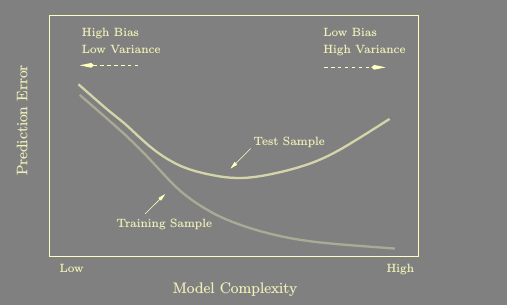
Figure 11. Test and training error as a function of model complexity.

$\text{EPE}_k(x_0) = \sigma^2 + \left[ \text{Bias}^2(f_k(x_0)) + \text{Var}_T(f_k(x_0)) \right]$

